Importing the dependencies

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Used to match and find the closest movie titles when there are slight differences in spelling.
import difflib 
#Converts textual movie data into numerical form using TF-IDF, which is crucial for handling large sets of text data.
from sklearn.feature_extraction.text import TfidfVectorizer 
#Measures the similarity between movies based on numerical features derived from text, allowing the system to recommend movies that are most similar to the user’s input.
from sklearn.metrics.pairwise import cosine_similarity

Data Collection and Pre-Processing

In [228]:
# loading the data from the csv file to apandas dataframe
df=pd.read_csv("movies.csv")

In [230]:
# printing the first 5 rows of the dataframe
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [232]:
# printing the last 5 rows of the dataframe
df.tail()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,"[{'name': 'Daniel Hsia', 'gender': 2, 'departm...",Daniel Hsia
4802,4802,0,Documentary,NaN,25975,obsession camcorder crush dream girl,en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,...,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16,Drew Barrymore Brian Herzlinger Corey Feldman ...,"[{'name': 'Clark Peterson', 'gender': 2, 'depa...",Brian Herzlinger


In [234]:
# number of rows and columns in the data frame
df.shape

(4803, 24)

In [236]:
# getting more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [238]:
# checking for missing values in each column
df.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [240]:
# selecting the relevant features for recommendation
selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [242]:
# replacing the null valuess with null string

for feature in selected_features:
    df[feature]=df[feature].fillna('')

In [244]:
# checking after replacing values in each column
df.isnull().sum()

index                      0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
director                   0
dtype: int64

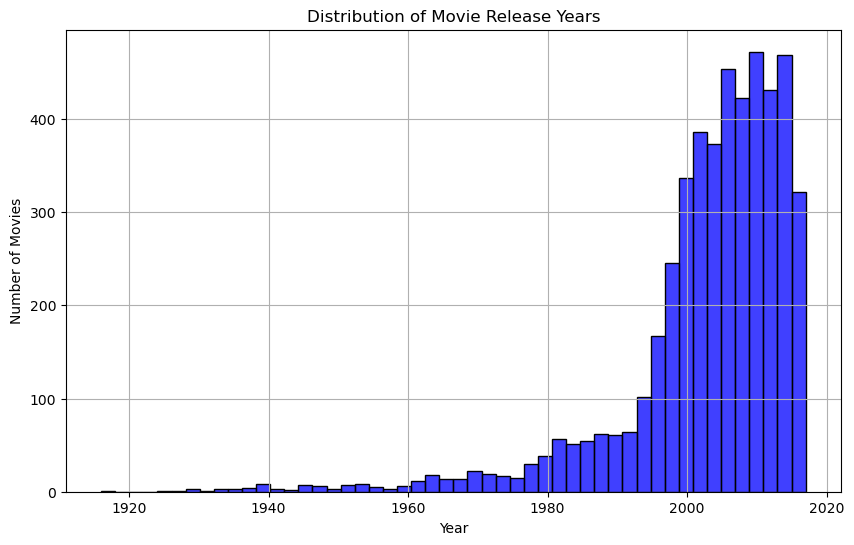

In [291]:
# Distribution of movie release dates
plt.figure(figsize=(10, 6))
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
sns.histplot(df['release_year'].dropna(), bins=50, kde=False, color='blue')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

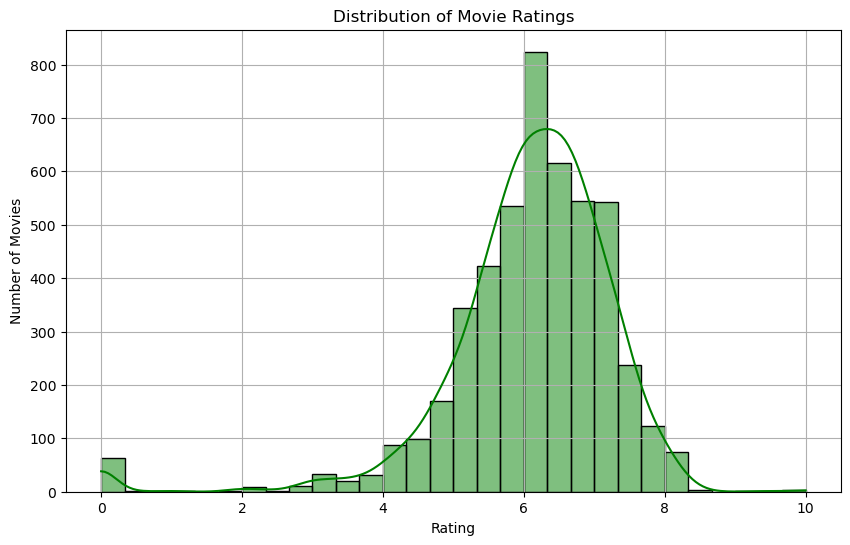

In [311]:
# Plot a histogram of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['vote_average'].dropna(), bins=30, kde=True, color='green')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()


In [246]:
# combining all the 5 selected features
combined_features = df['genres']+' '+df['keywords']+' '+df['tagline']+' '+df['cast']+' '+df['director']

In [248]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [250]:
# converting the text data to feature vectors
vectorizer = TfidfVectorizer()

In [252]:
feature_vectors=vectorizer.fit_transform(combined_features)

In [254]:
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

Cosine Similarity

In [257]:
# getting the similarity scores using cosine similarity
similarity = cosine_similarity(feature_vectors)

In [258]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


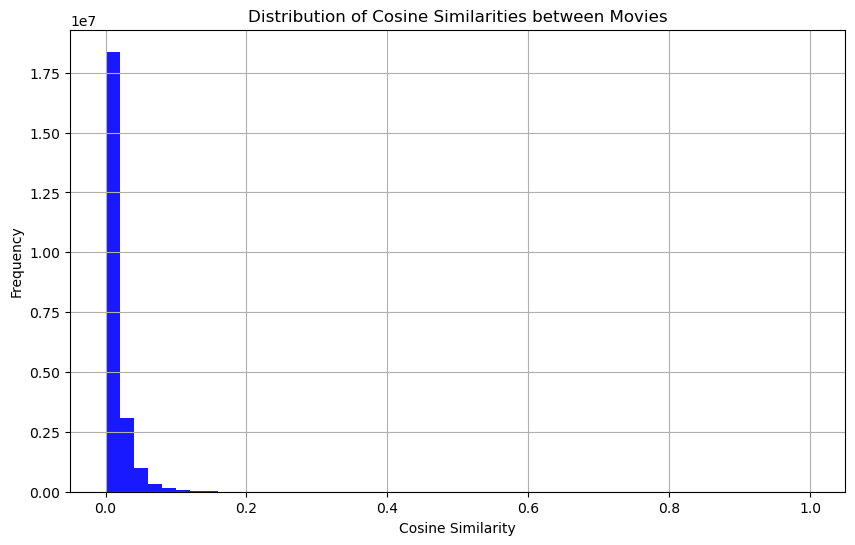

In [261]:
# Plotting the similarity distribution
similarities = similarity.flatten()
plt.figure(figsize=(10,6))
plt.hist(similarities, bins=50, color='blue', alpha=0.9)
plt.title('Distribution of Cosine Similarities between Movies')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [262]:
print(similarity.shape)

(4803, 4803)


Getting the movie name from the user

In [266]:
# creating a list with all the movie names given in the dataset
movies_list = df['title'].tolist()
print(movies_list)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [272]:
# getting the movie name from the user
movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name :  Iron man


In [274]:
# finding the close match for the movie name given by the user
find_close_match = difflib.get_close_matches(movie_name, movies_list)
print(find_close_match)

['Iron Man', 'Iron Man 3', 'Iron Man 2']


In [276]:
close_match = find_close_match[0]
print(close_match)

Iron Man


In [278]:
# finding the index of the movie with title
index_of_the_movie = df[df.title == close_match]['index'].values[0]
print(index_of_the_movie)

68


In [280]:
# getting a list of similar movies
similarity_score = list(enumerate(similarity[index_of_the_movie]))

In [282]:
# sorting the movies based on their similarity score
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)

[(68, 1.0000000000000002), (79, 0.40890433998005965), (31, 0.31467052449477506), (7, 0.23944423963486405), (16, 0.22704403782296803), (26, 0.21566241096831154), (85, 0.20615862984665329), (182, 0.19573956139611606), (511, 0.16702973947860686), (3623, 0.1609246088135586), (64, 0.15299924139445145), (203, 0.14818667948665118), (174, 0.1471993120942043), (4401, 0.14505971470107848), (101, 0.14401677581826294), (46, 0.14216268867232237), (169, 0.1380947013224906), (1740, 0.13624382641690763), (94, 0.1361681957902901), (788, 0.1330589507422922), (126, 0.13263982780511066), (131, 0.13137698586006535), (33, 0.13089810941050173), (2487, 0.12309731939910507), (783, 0.12162995562040377), (138, 0.11846458075866884), (2442, 0.11725512335483321), (661, 0.11719294096248463), (607, 0.11387063493435637), (38, 0.1126182690487113), (2651, 0.1121878787373205), (353, 0.1116846512704428), (122, 0.10850296033661253), (1553, 0.1079782217151326), (1451, 0.107849394974707), (242, 0.10630339022327012), (618, 0.

In [284]:
# print the name of similar movies based on the index
print('Movies suggested for you : \n')
i = 1
for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = df[df.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Iron Man
2 . Iron Man 2
3 . Iron Man 3
4 . Avengers: Age of Ultron
5 . The Avengers
6 . Captain America: Civil War
7 . Captain America: The Winter Soldier
8 . Ant-Man
9 . X-Men
10 . Made
11 . X-Men: Apocalypse
12 . X2
13 . The Incredible Hulk
14 . The Helix... Loaded
15 . X-Men: First Class
16 . X-Men: Days of Future Past
17 . Captain America: The First Avenger
18 . Kick-Ass 2
19 . Guardians of the Galaxy
20 . Deadpool
21 . Thor: The Dark World
22 . G-Force
23 . X-Men: The Last Stand
24 . Duets
25 . Mortdecai
26 . The Last Airbender
27 . Southland Tales
28 . Zathura: A Space Adventure
29 . Sky Captain and the World of Tomorrow


Movie Recommendation Sytem

In [287]:
movies_list = df['title'].tolist()

movie_name = input(' Enter your favourite movie name : ')

# finding the close match for the movie name given by the user
find_close_match = difflib.get_close_matches(movie_name, movies_list)

# finding the index of the movie with title
close_match = find_close_match[0]
index_of_the_movie = df[df.title == close_match]['index'].values[0]

# getting a list of similar movies
similarity_score = list(enumerate(similarity[index_of_the_movie]))

# sorting the movies based on their similarity score
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

# print the name of similar movies based on the index
print('Movies suggested for you : \n')
i = 1
for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = df[df.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

 Enter your favourite movie name :  Fast and furious


Movies suggested for you : 

1 . The Fast and the Furious
2 . Furious 7
3 . Fast Five
4 . 2 Fast 2 Furious
5 . Malibu's Most Wanted
6 . xXx
7 . The Fast and the Furious: Tokyo Drift
8 . Death Race
9 . S.W.A.T.
10 . The Faculty
11 . Cars
12 . American Heist
13 . The Final Destination
14 . Babylon A.D.
15 . The Skulls
16 . Find Me Guilty
17 . The Death and Life of Bobby Z
18 . Resident Evil
19 . Poetic Justice
20 . Boyz n the Hood
21 . In Time
22 . Need for Speed
23 . Ninja Assassin
24 . Street Kings
25 . D.E.B.S.
26 . Gone in Sixty Seconds
27 . Snow Falling on Cedars
28 . Machete Kills
29 . American Graffiti
